<img src="https://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" style="float:right;height:100px">
<img src="https://www.inf.utfsm.cl/images/sitio/di.png" style="float:left;height:100px">
<center>
    <h1> INF-395/477 Redes Neuronales Artificiales - I-2020</h1>
    <h1> Tarea 1 - Redes Neuronales y *Deep Learning*</h1>
    <h3> Parte 1: Propuesta </h3>
</center>

## Integrantes: 
* Gabriel Arjona  - 201473529-4
* Roberto Fuentes - 201173037-2 
* German Treimun  - 20l173085-2

#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones. Como equipo escogimos la siguiente afirmación: 

> **4. Convergencia**: Con la suficiente cantidad de iteraciones, una red neuronal $\underline{\text{siempre}}$ podrá converger algun mínimo local. El tiempo que tarda es $\underline{\text{independiente}}$ de la tasa de aprendizaje y el tamaño de batch.

Refutaremos esta afirmación basandonos en las dos palabras subrayadas de la afirmación.


## Introducción 

Pimero, debemos mencionar que usaremos el método de gradiente descendente (GD)para estudiar la convergencia de una red neuronal. Diremos entonces que la funcion $J$ permite evaluar el resultado de la red (entrenarla y que debisese ser un proxi hacia el error de prediccion), para entrenar las capas ocultas usando derivadas parciales y transformar el feedback global (resultado) en feedback local (neuronas ocultas). La _loss_ ($J$) debe ser diferenciable, y los parámetros serán los umbrales de exitacion y pesos de conexion. Si $\Theta$ es el vector que contiene todos los parametros entrenables (umbrales y pesos) y $J(\Theta)$ la función objetivo con la que deseamos entrenar la red, y escogiendo un $J$ diferenciable, podemos inicializar $\Theta$ y luego entrenar la red iterando hasta que el siguiente algoritmo converja.
Para $t = 1,2,...$ (training epochs):
    \begin{align*}
    \Theta^{t+1} = \Theta^{t} - \eta \nabla J(\Theta^{t})
    \end{align*}
Donde $\eta$ se conoce como _learning rate_, y es un parámetro que influye fuertemente en la convergencia del mismo. El algoritmo podrá, en el mejor de los casos, garantizar convergencia a un mínimo local de la función objetivo. Además si $J$ es convexa podemos asegurar esta convergencia.

Para esto, definimos lo siguiente:

Si J: $\mathbb{R}^m \rightarrow \mathbb{R}^{+}_0$ es diferenciable en $\Theta$, por Taylor tenemos:

$$ J(\Theta + \alpha d) = J(\Theta) + \alpha \langle \nabla J(z), d \rangle + o(\alpha)$$
$$ \lim_{\alpha \to 0} \frac{o(\alpha)}{\alpha} = 0 $$
Por lo tanto, si $\nabla J(z) \neq 0$, siempre podemos encontrar un valor $\overline{\alpha}$ tal que $\forall a \in [0, \overline{\alpha} ]$:

$$ o(\alpha) < \alpha \langle \nabla J(z), d \rangle \Rightarrow J(\Theta + \alpha d) - J(\Theta) < 2\langle \nabla J(z), d \rangle$$

Por lo tanto, si $\langle \nabla J(z), d \rangle < 0$ podemos avanzar en la dirección de $d$ para reducir el valor de $J$. Se dice que $d$ es una direccion de descenso.

Sin embargo, en redes con capas ocultas y funciones de activación no lineales, la funcion objetivo será altamente no convexa, como funcion de los parámetros de la red $\Theta$, aún si la función de costo ( _loss_ ) es convexa como función de $f(x;\Theta)$

En la practica, tiende a ser mas relevante la capacidad del algoritmo de entrenamiento de "escapar" de puntos denominados "puntos silla", ya que se demostró en otros articulos ([1](#refs) y [2](#refs)) que los óptimos locales son todos buenos, y más aun que estos óptimos locales son óptimos globales ([3](#refs)). Estos puntos sillas son los mas probables que ocurran, y la capacidad de escapar de estos puntos sillas dependerá fuertemente de la tasa de aprendizaje $\eta$

Tiene que existir una direccion que represente una direccion de descenso. Si la constante es unica, el algoritmo tiende a moverse en todas las direcciones, y no logra moverse en una direccion de descenso.

Por tanto la afirmación es refutable por la palabra subrayada. Esto lo demostraremos a través de 3 _datasets_ : uno sintético creado por nosotros, y dos reales extraidos de Kaggle. 


<a id='refs'></a>
## Referencias

* [1] _Skip connections as effective symetry breaking_. Emin Orthan 2017
* [2] _Distribution of the scaled test losses for neuronal networks with different numbers of hidden units. "The loss Surfaces of Multilayer Networks"_,Choromanska et al, 2015.
* [3] _Every Local Minimum Value Is the Global Minimun value of Induced Model in Nonconvex Machine Learning._ Kawaguchi, Kenji, Jiaoyang Huang, and Leslie Pack Kaelbling 2019

## Librerias

In [1]:
%matplotlib inline
# Import required libraries
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt
import sklearn
from ipywidgets import widgets

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

np.random.seed(0)

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


## 1) _Dataset_  sintético

Partiremos Trabajaremos con la primera sección de la preugnta: 
* Con la suficiente cantidad de iteraciones, una red neuronal $\underline{\text{siempre}}$ podrá converger algun mínimo local. 
Para demostrar que esto es falso, crearemos un _set_ de datos a partir de la siguiente ecuación:
$$ y = ax + e $$
Donde $x$ e $y$ finales con los que trabajaremos,$a$ será la pendiente de la curva y $e$ un ruido que se le aplicará a cada punto.

In [2]:
#Curva para generar data set sintetico 
y_real = lambda a,x,e : a*x + e

#Se setea la Semilla para reproducir experimentos con ruido generado
np.random.seed(0)

#Parámetros
a = 10
num_datos = 100
x_points = np.linspace(0,10,num_datos)
eps = np.random.normal(0,1,num_datos)
y_points = y_real(a,x_points,eps)

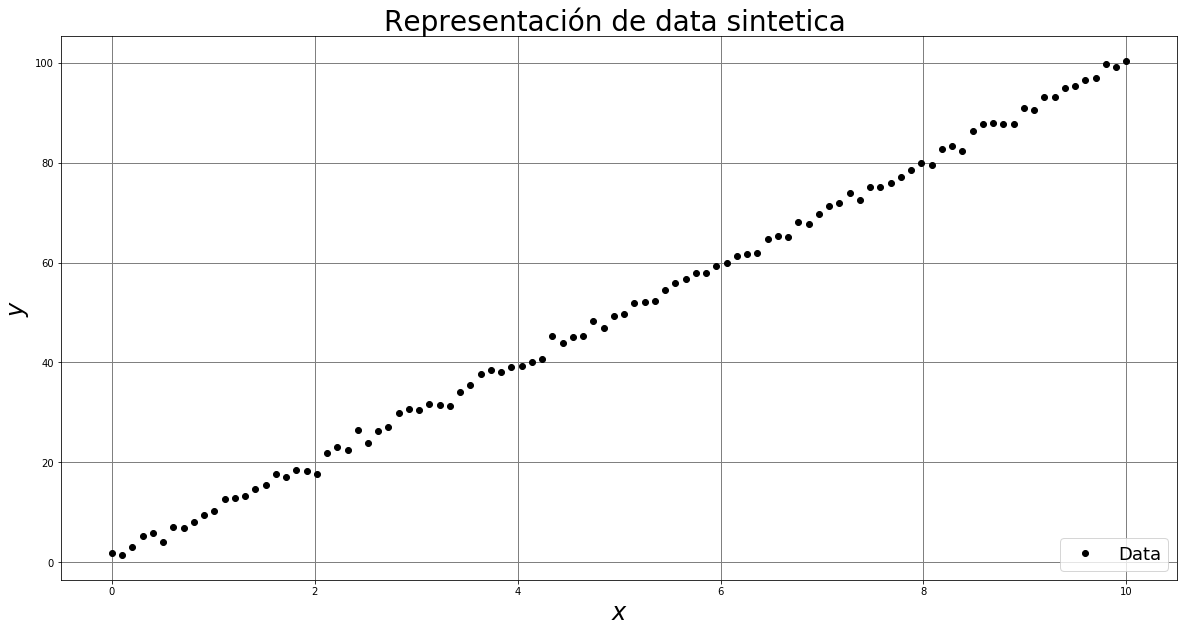

In [3]:
#Mostramos en una gráfica los puntos generados
plt.figure(figsize=(20,10))
plt.plot(x_points, y_points, 'ko', linewidth = 2, label = 'Data')
plt.legend(loc = 4,prop={'size':18})
plt.xlabel(r"$x$", fontsize = 24)
plt.ylabel(r"$y$", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.title("Representación de data sintetica ",fontsize = 28, horizontalalignment = 'center')
plt.show()

Claramente la mejor curva para realizar la regresión es $y = ax$. Siendo así, entrenaremos la red para poder obtener dicha recta. Crearemos una red con una capa oculta, con función de activación lineal y una capa de salida. Además, para la convergencia usaremos el gradiente descendente (GD) como algoritmo, junto a la _loss_ error cuadrático medio. Sin embargo, dentro de algoritmo GD fijaremos una tasa de aprendizaje, y veremos como con distintas tasas el algoritmo converge o diverge dependiendo de la tasa.

In [4]:
#Parametros algoritmo de regresion:
#x_points: datos independientes 
#y_points: datos construidos a partir de ax + e
#lrate: tasa de aprendizaje
#ep: cantidad de epocas (iteraciones) para el algoritmo GD

def regression_many_lrate(x_points, y_points, lrate, ep):
    #Creamos la red con una capa oculta, funcion de activacion lineal y una capa de salida.
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.add(Dense(1))

    #Usamos la funcion Stochastic Gradient Descent (SGD) de keras con loss error cuadratico medio.
    #Como queremos que el algoritmo no sea estocastico seteamos parámetros para prevenir dicho suceso
    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)
    #Data de entrenamiento
    train = 60
    #Entrenamos la red con datos de entrenamiento
    history = model.fit(x_points[:train],y_points[:train],epochs=ep,verbose=0)
    #Guardamos el historial del valor de la loss en cada epoca.
    loss_history = history.history["loss"]
    #Usando la red, constuimos la recta con los puntos dependientes que tenemos.
    y_exp = lambda x: model.predict([x])
    #Retornamos la recta y el historial de los valores de la loss en cada epoca.
    return y_exp(x_points), loss_history

In [5]:
#Parametros
#ep: epocas
#lrate: 5 distintas tasas de aprendizajes
ep = 100
lrate = np.arange(0.002,0.011,0.002)
iterations = np.arange(1,ep+1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


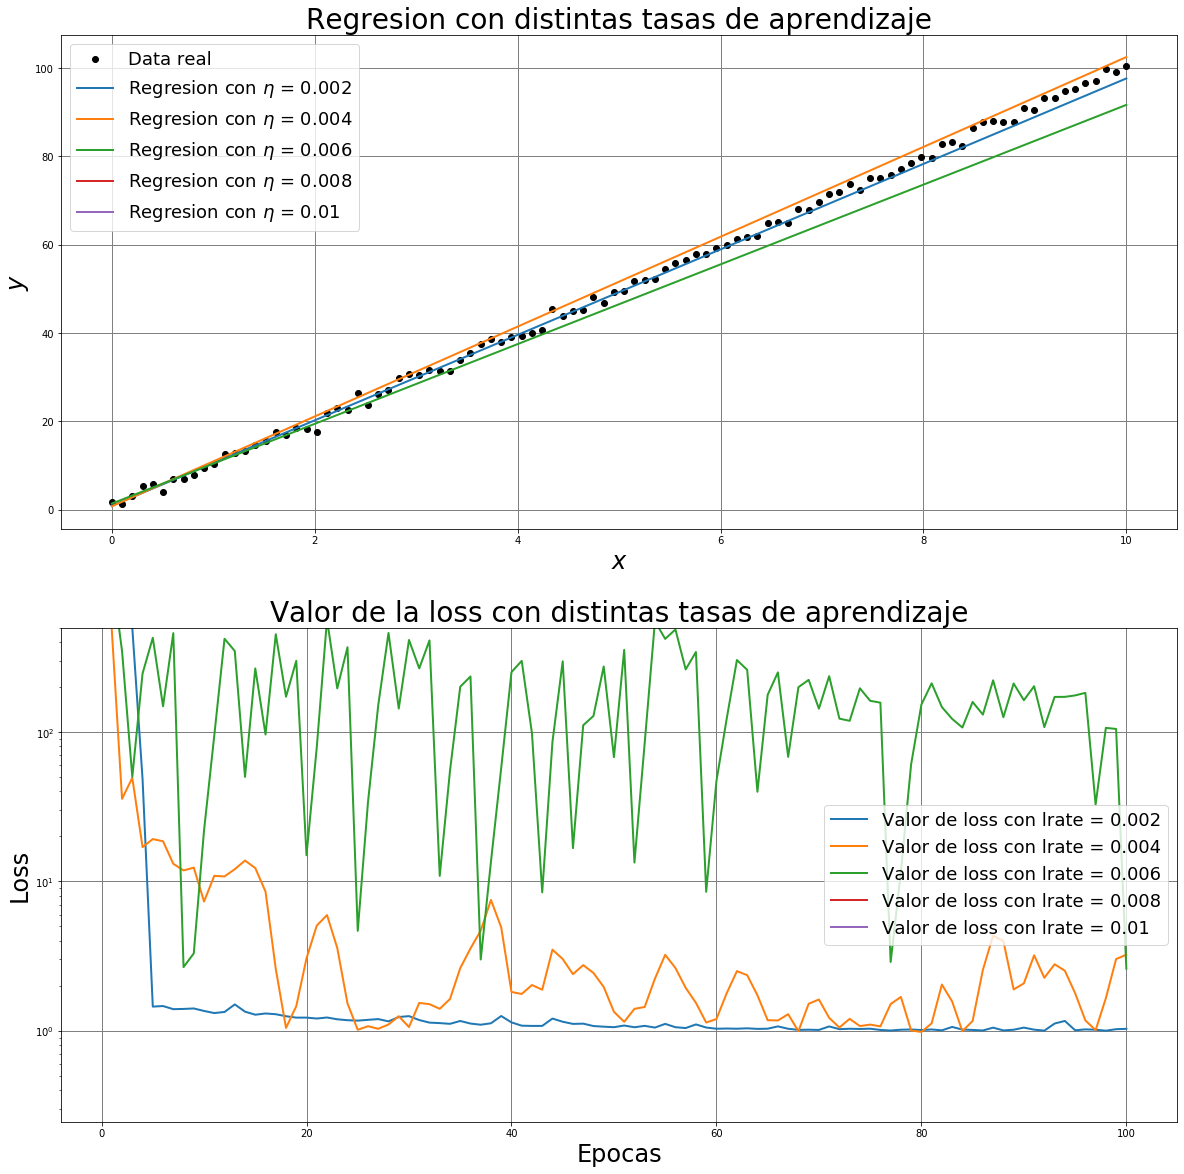

In [6]:
#Mostramos las rectas con distintas tasas y sus respectivos valores de loss en cada epoca.
plt.figure(figsize=(20,20))
plt.plot(x_points, y_points, 'ko', linewidth = 2, label = 'Real Data')
losses = []
y_exp_points = []
plt.subplot(1, 2, 1)
for i in lrate:
    y_exp, loss_history = regression_many_lrate(x_points, y_points, i,ep)
    y_exp_points.append(y_exp)
    losses.append(loss_history)
##Plot de regresion
plt.subplot(2, 1, 1)
plt.plot(x_points, y_points, 'ko', linewidth = 2, label = 'Data real')
for i in range(len(y_exp_points)):
    plt.plot(x_points, y_exp_points[i], linewidth = 2, label = r'Regresion con $\eta$ = ' + str(round(lrate[i],4)))
#plt.plot(iterations, loss_history, linewidth = 2, label = 'Valor de loss con lrate = ' + str(round(i,4)))
plt.legend(loc = 'best',prop={'size':18})
plt.xlabel(r"$x$", fontsize = 24)
plt.ylabel(r"$y$", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.title("Regresion con distintas tasas de aprendizaje",fontsize = 28, horizontalalignment = 'center')

#Plot de losses
plt.subplot(2, 1, 2)
for i in range(len(losses)):
    plt.semilogy(iterations, losses[i], linewidth = 2, label = 'Valor de loss con lrate = ' + str(round(lrate[i],4)))
plt.legend(loc = 'best',prop={'size':18})
plt.xlabel(r"Epocas", fontsize = 24)
plt.ylabel(r"Loss", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.ylim(-100,500)
plt.title("Valor de la loss con distintas tasas de aprendizaje",fontsize = 28, horizontalalignment = 'center')

plt.show()

Podemos apreciar por los gráficos que para distintos _learning rates_ (tasas de aprendizaje), algunos errores de entrenamiento ( _losses_ ) convergieron muy bien, meintras que otros divergieron de la curva que esperábamos, mostrando la clara dependencia de la tasa de aprendizaje que tiene la red para constuir la recta. Para ver esto de mejor manera, tomaremos una tasa de aprendizaje y veremos como en cada epoca se observa la divergencia de la red con una cierta tasa de aprendizaje.

## Curva de datos en cada iteración de la red

In [7]:
#Función similar a la anterior, solo que en cada epoca veremos que la prediccion de la red 
def regression_in_every_epoch(x_points, y_points, lrate, ep):
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.add(Dense(1))

    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)
    train = 60
    y_in_every_ep = []
    for i in range(ep):
        model.fit(x_points[:train],y_points[:train],epochs=1,verbose=0)
        y_in_every_ep.append(model.predict([x_points]))
    return y_in_every_ep

In [8]:
#Funcion para mostrar en cada epoca la recta creada por la red
def plot_regression_in_every_epoch(x_points, y_in_every_ep, lrate, i=0):
    plt.figure(figsize=(20,10))
    plt.plot(x_points, y_points, 'ko', linewidth = 2, label = 'Data real')
    plt.plot(x_points, y_in_every_ep[i], 'bo', linewidth = 2, label = 'Data con lrate = ' + str(lrate))
    plt.legend(loc = 'best',prop={'size':18})
    plt.xlabel(r"x", fontsize = 24)
    plt.ylabel(r"y", fontsize = 24)
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
    #plt.axis('tight')
    plt.title("Regresion en epoch = "+str(i+1),fontsize = 28, horizontalalignment = 'center')
    plt.xlim(0,10)
    plt.ylim(-200,200)
    plt.show()

Se debe tener en cosideración que la red al setear los pesos de forma aleatoria, cambia su comportamiento cada vez que ejecutamos esta función.

In [13]:
#Parametros
ep = 100
#Se escoje esta tasa debido a que en el experimento anterior se encontro que esta tasa hace que el algoritmo diverja
lrate_specific = 0.008
y_in_every_ep = regression_in_every_epoch(x_points, y_points, lrate_specific, ep)
dp = 1
#widget para mostrar recta en cada epoca
widgets.interact(plot_regression_in_every_epoch,
                 x_points=widgets.fixed(x_points),
                 y_in_every_ep=widgets.fixed(y_in_every_ep),
                 lrate = widgets.fixed(lrate_specific),
                 i=(0,ep-1,dp))

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_regression_in_every_epoch(x_points, y_in_every_ep, lrate, i=0)>

Tomando un $\eta$ del experimento anterior donde la curva diverge, podemos ver como en cada epoca el algoritmo trata de coverger a la recta esperada ($ax$), sin embargo ya que la tasa es inestable y fija, se puede apreciar como luego de una cierta epoca la curva diverge completamente. Esto muestra que la convergencia de la red es dependiente de la tasa de aprendizaje, haciendo que no siempre converja la red. Se puede obtener como conclución ademas que al bajar la tasa, el algoritmo tiende a asegurar convergencia, aunque de forma mas lenta.

Ahora trabajaremos con la segunda parte de la afirmación:
*  El tiempo que tarda es $\underline{\text{independiente}}$ de la tasa de aprendizaje y el tamaño de batch.

## Dependencia del tiempo

Gracias al experimento anterior se pudo notar que al ser dependiente la red de la tasa de aprendizaje, entre mas pequeña la tasa mas lenta será la convergencia de la red. Para esto, probaremos con distinas tasas (haciendo decrecer las tasa) y una cantidad grande de epocas. Para medir que una red converge y no necesite mas epocas, pondremos un limite ( _threshold_ ). Cuando la predicción de la red con los datos de entrenamientos sea menor que dicho _threshold_ entonces se dejará de iterar.

In [0]:
def regression_time(x_points, y_points, lrate, ep, train, threshold):
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.add(Dense(1))

    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)
    
    #loss_history = []
    #Tomaremos el tiempo desde que se comienza a entrenar la red hasta que converja.
    start = time.time()
    #Por cada epoca, si la prediccion del modelo es menor a cierto threshold entonces
    #se dejara de iterar. Caso contrario se iterará por todas epocas.
    for i in range(ep):
        history = model.fit(x_points[:train],y_points[:train],epochs=1,verbose=0)
        #loss_history.append(model.evaluate(x_points[:n], y_points[:n],verbose=0))
        if model.evaluate(x_points[:train], y_points[:train],verbose=0) < threshold:
            end = time.time()
            return i, round(end - start,4)
    end = time.time()
    return i, round(end - start,4)

In [0]:
#Parametros:
#lrate_specific: distintas tasa de aprendizaje 
#threshold: limite para medir convergencia

ep = 20000
lrate_specific_1 = 0.001
lrate_specific_2 = 0.0005
lrate_specific_3 = 0.0001
lrate_specific_4 = 0.00005
train = 60
threshold = 1

values_lr1 = []
values_lr2 = []
values_lr3 = []
values_lr4 = []
for i in range(5):
    values_lr1.append(regression_time(x_points, y_points, lrate_specific_1, ep, train, threshold))
    values_lr2.append(regression_time(x_points, y_points, lrate_specific_2, ep, train, threshold))
    values_lr3.append(regression_time(x_points, y_points, lrate_specific_3, ep, train, threshold))
    values_lr4.append(regression_time(x_points, y_points, lrate_specific_4, ep, train, threshold))

In [0]:
#Se almacenan en listas los valores del tiempo, para ser mostrados en un boxplot

times_lr1 = []
times_lr2 = []
times_lr3 = []
times_lr4 = []
for i in range(5):
    times_lr1.append(values_lr1[i][1])
    times_lr2.append(values_lr2[i][1])
    times_lr3.append(values_lr3[i][1])
    times_lr4.append(values_lr4[i][1])

data_to_plot = [times_lr1,times_lr2,times_lr3,times_lr4]

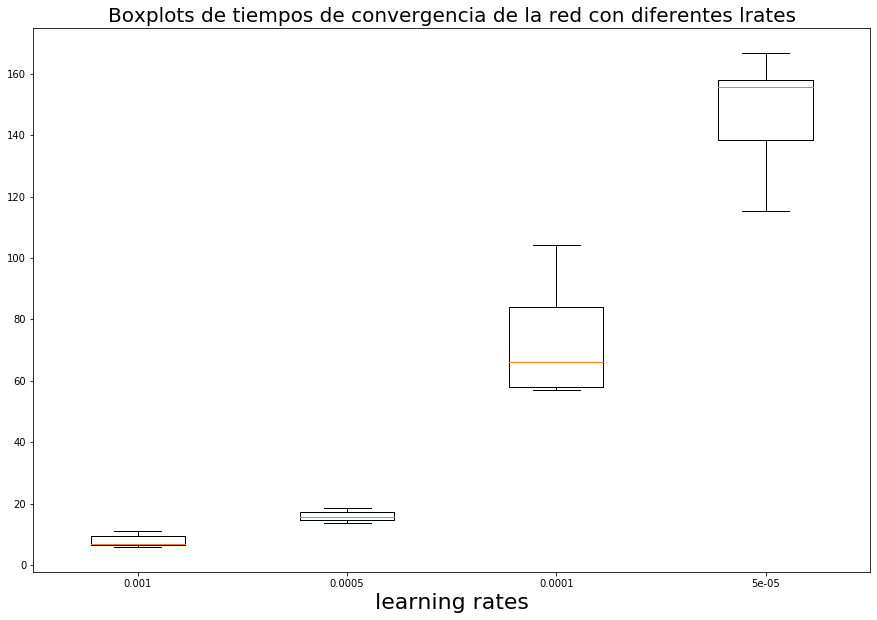

In [0]:
#Grafico de boxplot

fig = plt.figure(1, figsize=(15, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
ax.set_xticklabels([str(lrate_specific_1), str(lrate_specific_2), str(lrate_specific_3), str(lrate_specific_4)])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('learning rates', fontsize = 22)
plt.title("Boxplots de tiempos de convergencia de la red con diferentes lrates", fontsize = 20)
plt.show()

Podemos observar como a medida que decrece la tasa, el algoritmo tarda más en converger, haciendo que la red sea dependiente de la tasa de aprendizaje. 

## Dependencia del tamaño de batch

Al momento de entrenar el modelo, se tiene la opción de calcular la pérdida promedio utilizando una cierta cantidad de datos y actualizar los pesos con la derivada de esa pérdida a través del tamaño del _batch_ . Una opción es utilizar todos los datos para calcular esta pérdida, aunque si bien esto permite una rápida convergencia, en la práctica no es muy utilizado debido al estancamiento que puede tener en óptimos locales. Por otra parte, en cada epoca podemos usar un solo dato para calcular la perdida, obtener el gradiente y actualizar los pesos de conexión, aunque este proceso es bastante más lento, por lo que en la práctica se utiliza un tamaño de _batch_ aleatorio. Por ejemplo, si se tuviesen $1000$ datos y un batch de tamaño $500$, en una epoca se actualizarían los pesos dos veces, 1 por cada batch. Esto nos da a entender que el tiempo de convergencia de la red tambien es dependiente del tamaño de _batch_ que se utilice. Para mostrar esto, se realiza un experimento similar al anterior, aunque haciendo variar el tamaño del _batch_ y manteniendo fijo los otros parámetros.

In [0]:
def regression_batch(x_points, y_points, lrate, ep, train, bs=1):
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.add(Dense(1))

    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)
    
    loss_history = []
    start = time.time()
    for i in range(ep):
        history = model.fit(x_points[:train],y_points[:train],batch_size=bs,epochs=1,verbose=0)
    end = time.time()
    return i, round(end - start,4)

In [0]:
#Se almacenan en listas los valores del tiempo, para ser mostrados en un boxplot
values_bs1 = []
values_bs2 = []
values_bs3 = []
values_bs4 = []

#Parametros
#bs: distintos batch size
ep = 100
lrate_specific = 0.001
train = 60
threshold = 1
bs1 = 1
bs2 = 10
bs3 = 30
bs4 = train

for i in range(5):
    values_bs1.append(regression_batch(x_points, y_points, lrate_specific, ep, train, bs=bs1))
    values_bs2.append(regression_batch(x_points, y_points, lrate_specific, ep, train, bs=bs2))
    values_bs3.append(regression_batch(x_points, y_points, lrate_specific, ep, train, bs=bs3))
    values_bs4.append(regression_batch(x_points, y_points, lrate_specific, ep, train, bs=bs4))

In [0]:
bs1_list = []
bs2_list = []
bs3_list = []
bs4_list = []
for i in range(5):
    bs1_list.append(values_bs1[i][1])
    bs2_list.append(values_bs2[i][1])
    bs3_list.append(values_bs3[i][1])
    bs4_list.append(values_bs4[i][1])

data_to_plot_2 = [bs1_list,bs2_list,bs3_list,bs4_list]

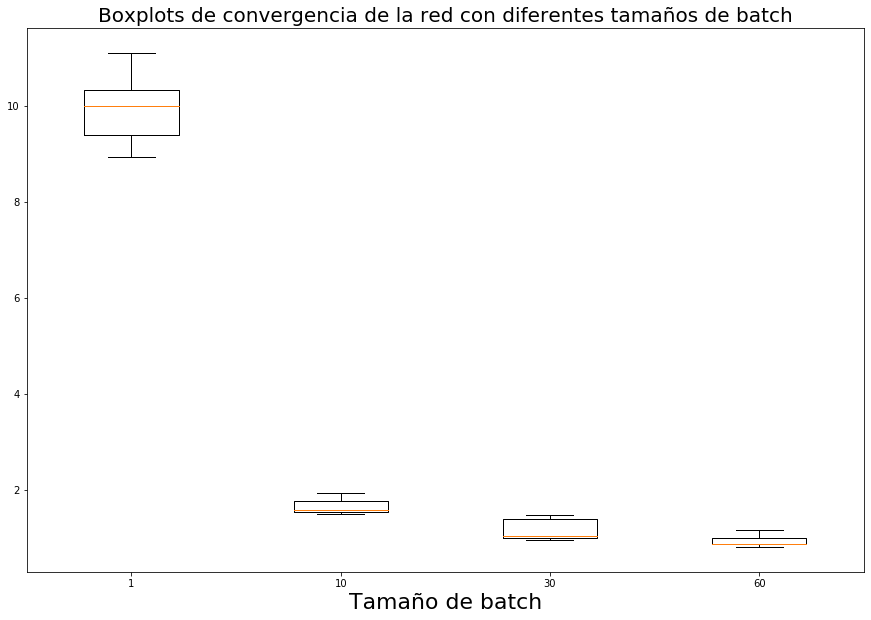

In [0]:
#Grafico de boxplot para distintos batch size
fig = plt.figure(1, figsize=(15, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot_2)
ax.set_xticklabels([str(bs1), str(bs2), str(bs3), str(bs4)])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Tamaño de batch', fontsize = 22)
plt.title("Boxplots de convergencia de la red con diferentes tamaños de batch", fontsize = 20)
plt.show()

Podemos obsevar que a medida que aumenta el tamaño del batch, la red demora menos en converger, haciendo que la red tambien sea dependiente del tamaño del batch para converger.

## 2) Primer _Dataset_ Real

El siguiente _dataset_ contiene información de distintas carácteristicas de las casas en los suburbios de la ciudad de Boston. El dataset original fue obtenido desde el Boston Standard Metropolitan Statistical Area en 1970. Entre las caracteristicas de esete dataset podemos encontrar el numero promedio de habitaciones, el nivel de crimen por la zona y un indice de acceso a las autpistas entre otras. El objetivo de este _dataeset_ es poder predecir el precio de las casas dada la información de las distintas caracteristicas. Los datos para este taller fueron obtenidos de Kaggle a través del siguiente [enlace](https://www.kaggle.com/vikrishnan/boston-house-prices).

In [0]:
# cargamos el dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset2 = dataframe.values
# se divide el dataset en entrada (X) y salida (Y)
X = dataset2[:,0:13]
Y = dataset2[:,13]

#se separa también cada dataset en train y test
X1_train = X[:340]
Y1_train = Y[:340]

X1_test = X[340:]
Y1_test = Y[340:]

In [13]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Observamos que el dataset tiene en este caso 13 caracteristicas que utilizaremos como input, la cuales definimos anteriormente como $X$ y el output que es la último característica y corresponde al valor de las casas en miles de dólares, el cual definimos como $Y$.

In [0]:
# Definición de regresión para la data real, es bastante similar a la anterior con data sintética
# pero en este caso se debe cambiar la dimensión del modelo.
# Además se utilizó relu como función de activación
def regressionRealData1(X, Y, lrate, ep, dim, layers, out_layers):
    model = Sequential()
    model.add(Dense(layers, input_dim=dim, activation='relu'))
    model.add(Dense(out_layers))

    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(X[0],Y[0],epochs=ep,verbose=0)
    loss_history = history.history["loss"]
    y_exp = lambda x: model.predict([x])
    print(model.evaluate(X[1], Y[1]))
    return loss_history

Se entrena la red, y es necesario en este caso ajustar la dimensionalidad del modelo, dado que el dataset de entrada tiene 13 carácteristicas.

In [0]:
#Se setean la cantidad epochs y los learning rates con los que se entrenará 
ep = 100
lrate = np.arange(0.5,1.5,0.2)
losses_data2 = []

#Entrenamos con distintos learning rates y guardamos su error de entrenamiento para cada uno
for i in lrate:
    loss_history = regressionRealData1([X1_train,X1_test], [Y1_train,Y1_test], i,ep, 13,4,1)
    losses_data2.append(loss_history)

166/166 [==============================] - 0s 595us/step
106.56095523144825
166/166 [==============================] - 0s 780us/step
132.252021835511
166/166 [==============================] - 0s 592us/step
129.64211305365504
166/166 [==============================] - 0s 562us/step
nan
166/166 [==============================] - 0s 865us/step
nan


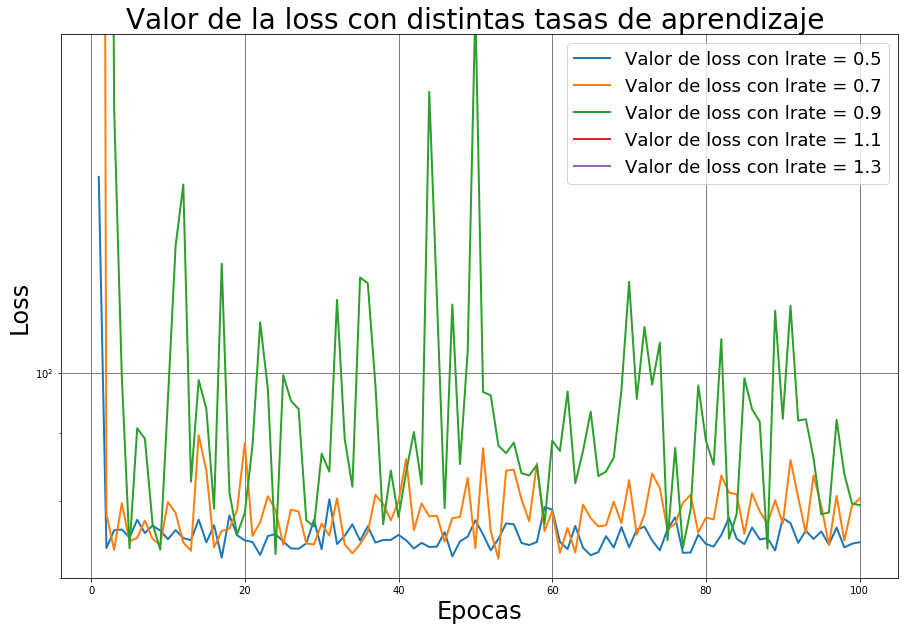

In [0]:
#Gráfico para observar el valor de la loss respecto a los learning rates
plt.figure(figsize=(15,10))

iterations = np.arange(1,ep+1)

for i in range(len(losses_data2)):
    plt.semilogy(iterations, losses_data2[i], linewidth = 2, label = 'Valor de loss con lrate = ' + str(round(lrate[i],7)))
plt.legend(loc = 'best',prop={'size':18})
plt.xlabel(r"Epocas", fontsize = 24)
plt.ylabel(r"Loss", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.ylim(70,180)
plt.title("Valor de la loss con distintas tasas de aprendizaje ",fontsize = 28, horizontalalignment = 'center')

plt.show()

Como se aprecia, el comportamiento es bastante similar que en la data síntetica, dependiendo del larning rate notamos que el error de entrenamiento puede disminuir en seguida y mantenerse bajo como es el caso de $0.5$, mientras que para valores como $0.7$ la loss comienza a oscilar un poco más, y finalmente si aumentamos más el learning rate observamos que para el valor $0.9$ la loss oscila mucho, y de hecho al aumentar más el valor, ya no existe convergencia y es por ello que que error de entramiento para los learning rates $1.1$, y $1.3$ ni si quiera aparecen en el gráfico.

## 3) Segundo  _dataset_ real

Esta _data_ es para predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente [link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data), las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

In [0]:
url_train = 'https://raw.githubusercontent.com/garjona/Tarea3-INF393-II-2019/master/DailyDelhiClimateTrain.csv?token=AFHXMWUE7N4SHFPDSK5AMTK6FEA6W'
df = pd.read_csv(url_train)
url_test = 'https://raw.githubusercontent.com/garjona/Tarea3-INF393-II-2019/master/DailyDelhiClimateTest.csv?token=AFHXMWSXPE4SCIWHBW4M4OC6FEARQ'

In [0]:
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

Dada la poca información se extrae más con respecto al día

In [0]:
#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) 
df.drop(["date"], axis=1, inplace=True)

In [0]:
# Se toman los datos para el entrenamiento
y = df.pop("y_value").values
X = df.values 
X_train = X
y_train = y
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

In [0]:
#Dataframe de los datos de entrenamiento
df.head()

,meantemp,humidity,wind_speed,meanpressure,cday,day,day_of_year,week_of_year,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,1,1,1,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,2,2,2,1,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,3,3,3,1,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,4,4,4,1,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,5,5,5,1,2013,1,0,0,0,1


In [0]:
print(X_train[1])
print(y_train[1])

[2.475000e+01 5.562500e+01 4.400000e+00 1.013125e+03 0.000000e+00
 2.000000e+01 2.930000e+02 4.300000e+01 2.014000e+03 1.000000e+01
 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
25.625


Se hace lo mismo para los datos de tests

In [0]:
df = pd.read_csv(url_test)
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
columns_zeros = np.zeros(df.shape[0],dtype=int)
df['season_fall'] = columns_zeros
df['season_rainy'] = columns_zeros
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) 
df.drop(["date"], axis=1, inplace=True) 

y = df.pop("y_value").values
X = df.values 
X_test = X
y_test = y
X_test, y_test = shuffle(X_test, y_test, random_state=0) 

In [0]:
#Se define la funcion que hará la regresión
def regressionRealData3(X, Y, lrate, ep, dim, layers, out_layers):
    model = Sequential()
    model.add(Dense(layers, input_dim=dim, activation='relu'))
    model.add(Dense(out_layers))

    opt = SGD(lr=lrate, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error',optimizer=opt)

    history = model.fit(X[0],Y[0],epochs=ep,verbose=0)
    loss_history = history.history["loss"]
    y_exp = lambda x: model.predict([x])
    print(model.evaluate(X[1], Y[1]))
    return loss_history

In [0]:
#se define los parametros
ep = 100
lrate = np.arange(0.85,1.05,0.05)
dim = 14
layers = 4
out_layers = 1
losses_data3 = []

for i in lrate:
    loss_history = regressionRealData3([X_train,X_test], [y_train,y_test], i,ep, dim,layers,out_layers)
    losses_data3.append(loss_history)

113/113 [==============================] - 0s 869us/step
69.60326412504753
113/113 [==============================] - 0s 1ms/step
67.23542704624413
113/113 [==============================] - 0s 868us/step
122.96920540058507
113/113 [==============================] - 0s 1ms/step
nan
113/113 [==============================] - 0s 973us/step
nan


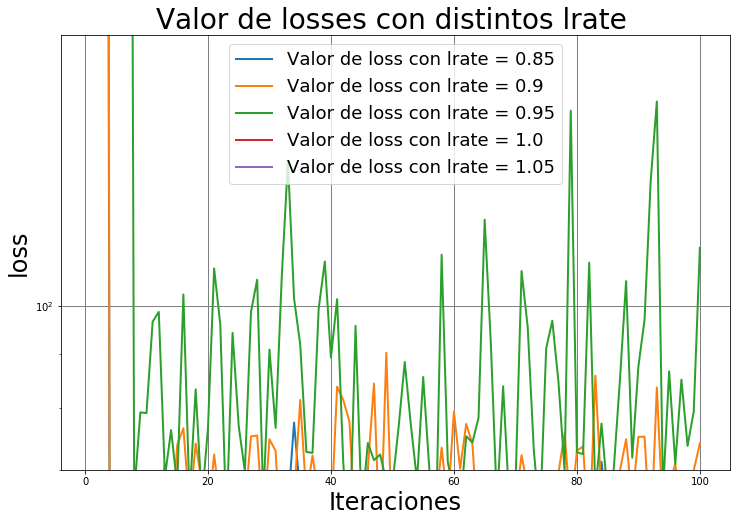

In [0]:
plt.figure(figsize=(15,10))

iterations = np.arange(1,ep+1)

for i in range(len(losses_data3)):
    plt.semilogy(iterations, losses_data3[i], linewidth = 2, label = 'Valor de loss con lrate = ' + str(round(lrate[i],7)))
plt.legend(loc = 'best',prop={'size':18})
plt.xlabel(r"Iteraciones", fontsize = 24)
plt.ylabel(r"loss", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.ylim(70,180)
plt.title("Valor de losses con distintos lrate ",fontsize = 28, horizontalalignment = 'center')

plt.show()

## Conclusiones

Podemos observar gracias a distintos experimentos la dependiencia de ciertos parámetros que tiene la red para asegurar convergencia en un tiempo prudente (dado el contexto). En concreto, en el taller se estudio la relevancia de la tasa de aprendizaje y el tamaño de _batch_, y como estos influyen fuertemente en el tiempo y convergencia que tiene la red. Si bien el tamaño de batch se inicializa de forma aleatoria y la tasa puede ser actualizada en cada epoca (mediante métodos como Adagrad, Adam, Adadelta, etc) para asegurar convergencia, es claro que la red necesita controlar bien estos parámetros para asegurar una convergencia en un tiempo no muy extenso.

#### <a id="segundo"></a>
## 2. Challenge Kaggle

Pendiente